In [86]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [87]:
import pandas as pd

In [88]:
!pip install ivis

In [89]:
from ivis import Ivis
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import matplotlib.pyplot as plt

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix, average_precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import roc_auc_score, auc

import time
import warnings
warnings.filterwarnings('ignore')

In [91]:
train_df = pd.read_csv("/gdrive/My Drive/Colab_Notebooks/Sentence-Analysis/input.csv")
test_df =pd.read_csv("/gdrive/My Drive/Colab_Notebooks/Sentence-Analysis/input_test.csv")

mappings = {1: 0, 2: 1, 3:2}

train_df.label = [mappings[item] for item in train_df.label]
train_df.head()

,Unnamed: 0,patient_id,sequence,label
0,0,Z8399761,"(unclear history), venous insufficiency, PVD, ...",2
1,1,Z11957588,period. It apparently cuts car accident rates ...,0
2,2,Z10809276,(P) 5 Hearing: no concerns Vision: needs updat...,1
3,3,Z8539944,"remission, s/p 1 suicide attempt, 3 IPLOC admi...",2
4,4,Z12696803,should be pursued at that point in time. He an...,0


In [92]:
X = train_df["sequence"]
y = train_df["label"]

In [93]:
y_label = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.3, stratify = y_label)

In [94]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english",analyzer='word')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
#count_valid = count_vectorizer.transform(X_valid)

# Create the CountVectorizer DataFrame: count_train
count_train = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the CountVectorizer DataFrame: test_df
count_test = pd.DataFrame(count_test.A, columns=count_vectorizer.get_feature_names())

#count_valid = pd.DataFrame(count_valid.A, columns=count_vectorizer.get_feature_names())
count_train.head()

,10,11,15,16,18,2017,22,38611851,50,70,abscess,accompanied,administered,admissions,age,alexander,alzheimer,ambulatory,amyloid,angiopathy,anna,annual,anticoagulation,antiplatelets,anxiety,appendectomy,assessment,assistance,attempt,awareness,behavioral,benign,blake,block,branch,bso,bundle,bwh,cataract,cerebral,...,progressive,provider,pursued,pvd,recent,referral,referred,referring,regarding,related,relation,remission,renal,report,results,review,rituxan,seizure,significant,status,stenting,suicide,summary,systems,tah,thigh,time,tracheomalacia,transient,ulcerations,unclear,upset,venous,verbal,vertigo,visit,volume,weight,wife,years
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english",analyzer='word')
tfidf_train= tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_train  = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_test  = pd.DataFrame(tfidf_test.A, columns=tfidf_vectorizer.get_feature_names())

tfidf_train.head()

,10,11,15,16,18,2017,22,38611851,50,70,abscess,accompanied,administered,admissions,age,alexander,alzheimer,ambulatory,amyloid,angiopathy,anna,annual,anticoagulation,antiplatelets,anxiety,appendectomy,assessment,assistance,attempt,awareness,behavioral,benign,blake,block,branch,bso,bundle,bwh,cataract,cerebral,...,progressive,provider,pursued,pvd,recent,referral,referred,referring,regarding,related,relation,remission,renal,report,results,review,rituxan,seizure,significant,status,stenting,suicide,summary,systems,tah,thigh,time,tracheomalacia,transient,ulcerations,unclear,upset,venous,verbal,vertigo,visit,volume,weight,wife,years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.263644,0.000000,0.0,0.0,0.0,0.000000,0.263644,0.0,0.0,0.0,0.263644,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.228188,0.0,0.0,0.0,0.0,0.263644,0.00000,0.0,0.263644,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.263644,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.313426,0.000000,0.0,0.0,0.0,0.0,0.0,0.313426,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.23107,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.23107,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.23107,0.0,0.000000,0.0,0.23107,0.23107,0.0,0.23107,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203012,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.156338,0.203012,0.0,0.0,0.406024,0.0,0.0,0.0,0.0,0.000000,0.203012,0.0,0.0,0.0,0.203012,0.000000,0.0,0.0,0.0,0.000000,0.0,0.203012,0.0,0.0,...,0.0,0.203012,0.0,0.00000,0.0,0.203012,0.000000,0.203012,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.191994,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [96]:
tfidf_train = tfidf_train.to_numpy()
tfidf_test = tfidf_test.to_numpy()

In [97]:
print(np.unique(y_test))

[0 1 2]


In [98]:
ivis = Ivis(embedding_dims=20, model='maaten',
           n_epochs_without_progress=5, 
            k =10, batch_size= 4 #deletee when get full gold standard dataset
            )
ivis.fit(tfidf_train, y_train.values)

100%|██████████| 14/14 [00:00<00:00, 139.17it/s]

Building KNN index
Extracting KNN neighbours


Training neural network
Epoch 1/1000
4/4 [==============================] - 2s 30ms/step - loss: 1.3304 - stacked_triplets_loss: 0.7450 - supervised_loss: 1.9158
Epoch 2/1000
4/4 [==============================] - 0s 28ms/step - loss: 2.2056 - stacked_triplets_loss: 0.8378 - supervised_loss: 3.5735
Epoch 3/1000
4/4 [==============================] - 0s 25ms/step - loss: 2.4567 - stacked_triplets_loss: 1.6294 - supervised_loss: 3.2840
Epoch 4/1000
4/4 [==============================] - 0s 28ms/step - loss: 2.4550 - stacked_triplets_loss: 2.0569 - supervised_loss: 2.8532
Epoch 5/1000
4/4 [==============================] - 0s 27ms/step - loss: 1.9648 - stacked_triplets_loss: 2.0926 - supervised_loss: 1.8370
Epoch 6/1000
4/4 [==============================] - 0s 26ms/step - loss: 1.7240 - stacked_triplets_loss: 2.3754 - supervised_loss: 1.0726


Ivis(annoy_index_path=None, batch_size=4, build_index_on_disk=True,
     callbacks=None, distance='pn', embedding_dims=20, epochs=1000, k=10,
     knn_distance_metric='angular', model='maaten', n_epochs_without_progress=5,
     neighbour_matrix=<ivis.data.neighbour_retrieval.knn.AnnoyKnnMatrix object at 0x7f033fe85450>,
     ntrees=50, precompute=True, search_k=-1,
     supervision_metric='sparse_categorical_crossentropy',
     supervision_weight=0.5, verbose=1)

In [99]:
train_embeddings = ivis.transform(tfidf_train)
test_embeddings = ivis.transform(tfidf_test)

2/2 [==============================] - 0s 6ms/step


In [100]:
print(test_embeddings)

[[-0.75651014  1.3010774  -1.9624351  -1.8740206  -1.1085126   0.42829514
   0.24985246 -1.1842496   0.58382326  1.5269966   1.7245038  -0.66519254
   0.93734795 -1.1295116  -0.8072184  -0.9754647   1.5072815  -2.629514
  -0.84116304  0.46415085]
 [-1.5525624   3.439894   -1.177914   -2.5617166  -2.6140242  -0.4575248
   0.4929725  -1.646693    3.0645895   2.3294153   1.7157093  -0.969566
   0.26055697 -0.15587519 -0.31555948 -1.0553123   1.272333   -3.0641026
   0.9971819  -0.04284528]
 [-0.40902773  0.59530634 -0.1436459  -0.04685452 -0.44938844  0.1362139
  -0.3038791  -0.5768669   0.99905145  0.01902389 -0.8450431  -0.8947432
   0.10107357 -0.11606788  0.12208005  0.5096498  -0.16050403 -0.40151855
   0.43576065 -0.5700134 ]
 [-0.22049882  2.4847138  -1.1341506  -2.4320943  -1.9377218   0.20351487
  -0.23180355 -0.22054099  1.4049602   1.8799615   1.0847749  -0.59415346
   0.56480104 -0.28470156 -0.17295209 -0.88942987  0.77511245 -1.7132343
   0.32125768 -0.05899071]
 [-0.701827  

Text(0.5, 1.0, 'Testing Set')

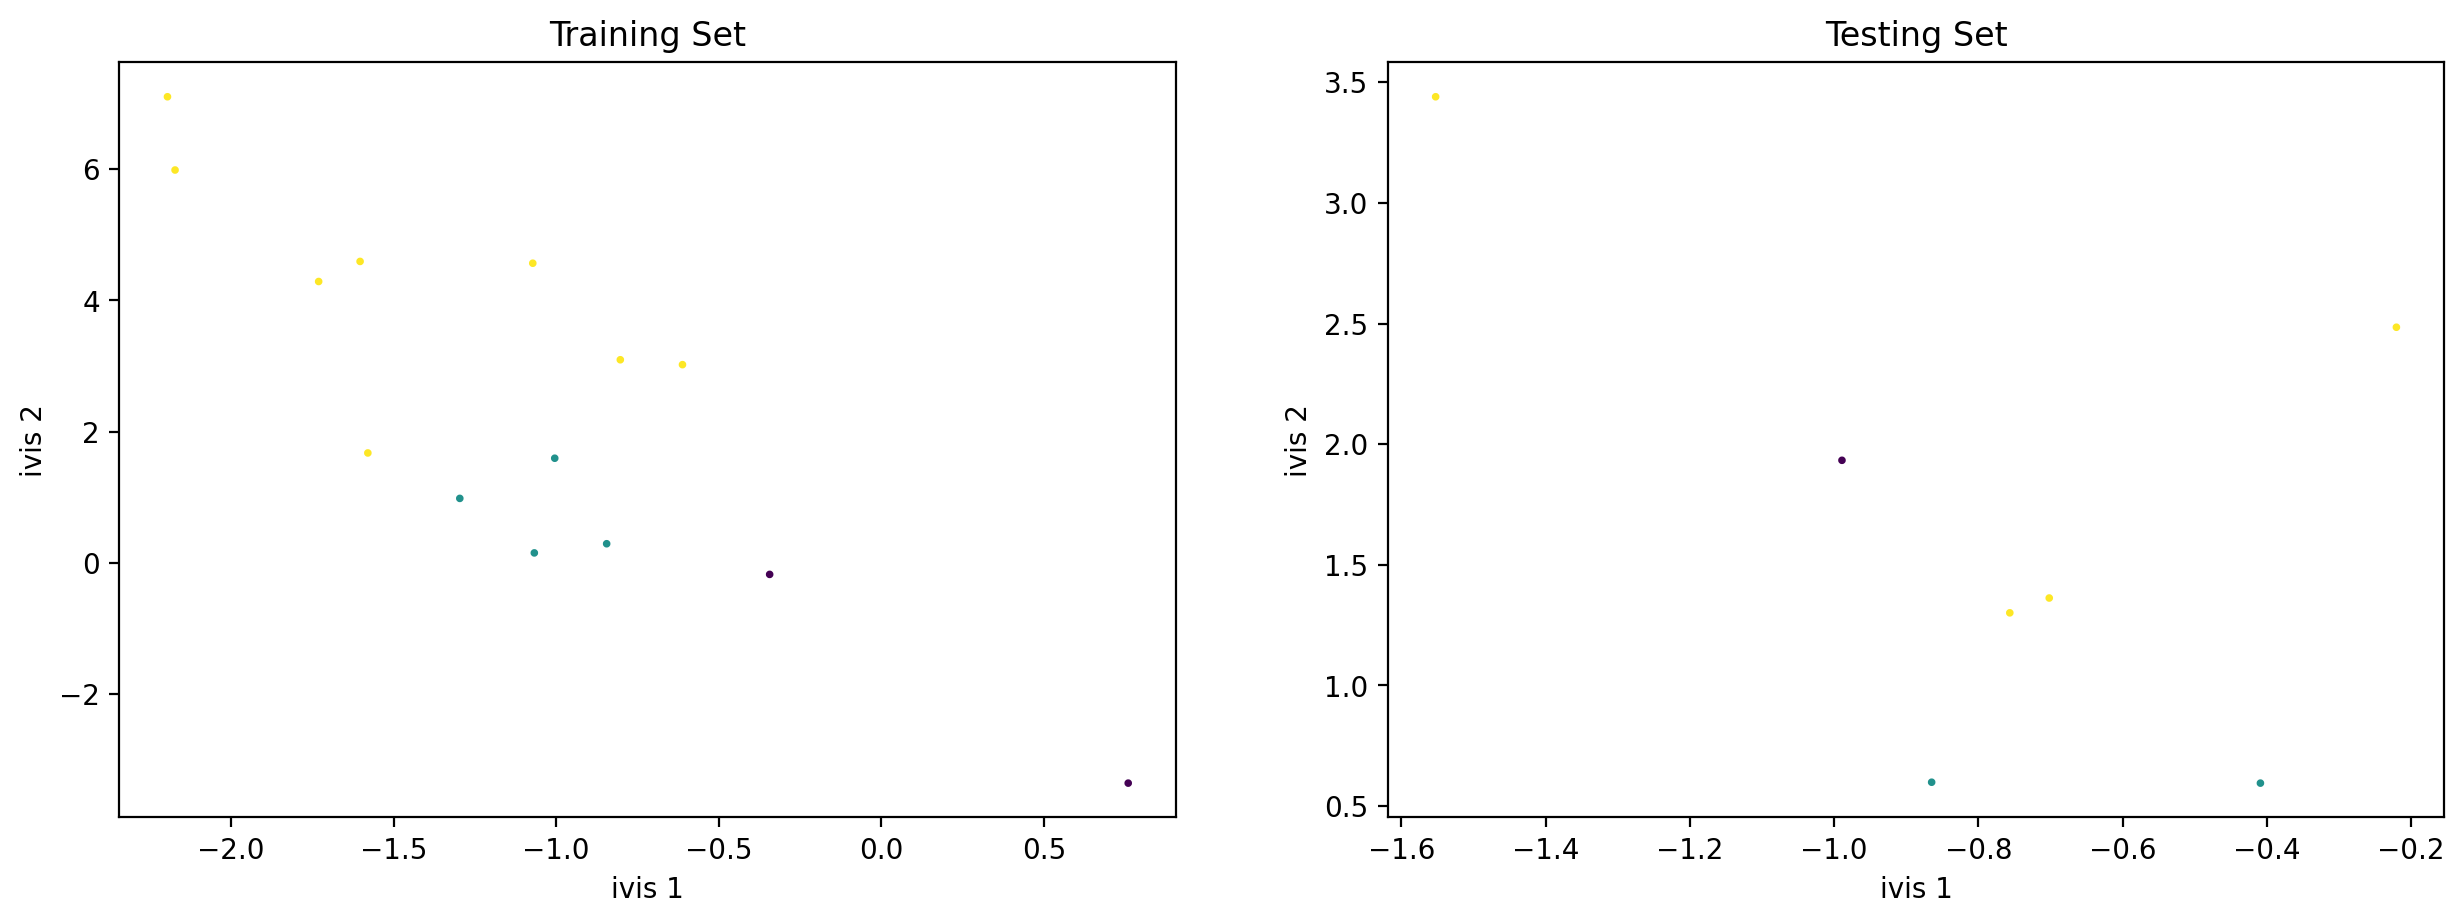

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=200)
ax[0].scatter(x=train_embeddings[:, 0], y=train_embeddings[:, 1], c=y_train, s=3)
ax[0].set_xlabel('ivis 1')
ax[0].set_ylabel('ivis 2')
ax[0].set_title('Training Set')

ax[1].scatter(x=test_embeddings[:, 0], y=test_embeddings[:, 1], c=y_test, s=3)
ax[1].set_xlabel('ivis 1')
ax[1].set_ylabel('ivis 2')
ax[1].set_title('Testing Set')

In [102]:
clf = LogisticRegression(solver="lbfgs").fit(train_embeddings, y_train)
labels = clf.predict(test_embeddings)
proba = clf.predict_proba(test_embeddings)

target_names = ['NO', 'NTR', 'YES']
results = classification_report(y_test, labels, target_names=target_names, output_dict=True)
results = pd.DataFrame(results).transpose()
print(results)

print('\nConfusion Matrix')
print(confusion_matrix(y_test, labels))
#print('Average Precision: '+str(average_precision_score(y_test, proba[:, 1])))
#print('ROC AUC: '+ str(roc_auc_score(y_test, labels, multi_class='ovr', average = 'macro')))

              precision    recall  f1-score   support
NO             0.000000  0.000000  0.000000  1.000000
NTR            0.000000  0.000000  0.000000  2.000000
YES            0.750000  0.750000  0.750000  4.000000
accuracy       0.428571  0.428571  0.428571  0.428571
macro avg      0.250000  0.250000  0.250000  7.000000
weighted avg   0.428571  0.428571  0.428571  7.000000

Confusion Matrix
[[0 0 1]
 [2 0 0]
 [1 0 3]]


In [103]:
clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(train_embeddings, y_train)

labels_random_forest = clf_random_forest.predict(test_embeddings)

target_names = ['NO', 'NTR', 'YES']
results = classification_report(y_test, labels_random_forest, target_names=target_names, output_dict=True)
results = pd.DataFrame(results).transpose()
print(results)

print('\nConfusion Matrix')
print(confusion_matrix(y_test, labels_random_forest))

#print('ROC AUC: '+ str(roc_auc_score(y_test, labels_random_forest, multi_class = 'ovo')))

              precision    recall  f1-score   support
NO             0.000000  0.000000  0.000000  1.000000
NTR            1.000000  0.500000  0.666667  2.000000
YES            0.750000  0.750000  0.750000  4.000000
accuracy       0.571429  0.571429  0.571429  0.571429
macro avg      0.583333  0.416667  0.472222  7.000000
weighted avg   0.714286  0.571429  0.619048  7.000000

Confusion Matrix
[[0 0 1]
 [1 1 0]
 [1 0 3]]
